In [16]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [17]:
df1 = pd.read_csv('data/notes.csv')
df2 = pd.read_csv('data/ratings.csv')

merged_df = pd.merge(df1, df2, on='noteId', how='inner')

data = merged_df[['noteId', 'summary', 'helpfulnessLevel']]
df = data.drop_duplicates().dropna()
print(df)

                    noteId                                            summary  \
0      1783181538789605871  The United States has 50 States     https://da...   
2      1783181538789605871  The United States has 50 States     https://da...   
4      1586769867381669889  Clinton is not alone in this claim, the F.B.I....   
5      1575594018691420160  This may be the first public demonstration of ...   
6      1591119055103983616  Yoel Roth is no longer the head of  Twitter’s ...   
...                    ...                                                ...   
13533  1769857672114024502   shope.ee/2AqghSiwVQ    Akun2 yang merusak ikl...   
13534  1775711591646081459  &quot;auschwitz.history&quot; is not the actua...   
13535  1746787265626476833  Der AfD-Antrag wurde abgelehnt. Das beschlosse...   
13536  1746799072147653096  Es handelt sich im Fall der Gastronomie nicht ...   
13537  1756026556504318371  N.N. Das ist kein Fall für die CNs sondern für...   

      helpfulnessLevel  
0 

                    noteId                                            summary  \
0      1783181538789605871  The United States has 50 States     https://da...   
4      1586769867381669889  Clinton is not alone in this claim, the F.B.I....   
5      1575594018691420160  This may be the first public demonstration of ...   
6      1591119055103983616  Yoel Roth is no longer the head of  Twitter’s ...   
8      1763711441796739494  The note handed to Chalino Sanchez was believe...   
...                    ...                                                ...   
13522  1603580800691314688  None of  WaPo's Drew Harwall, NYT's Ryan Mac, ...   
13530  1744811920148906128  Starmer, like a lot of lawyers worked pro bono...   
13533  1769857672114024502   shope.ee/2AqghSiwVQ    Akun2 yang merusak ikl...   
13535  1746787265626476833  Der AfD-Antrag wurde abgelehnt. Das beschlosse...   
13536  1746799072147653096  Es handelt sich im Fall der Gastronomie nicht ...   

      helpfulnessLevel  
0 

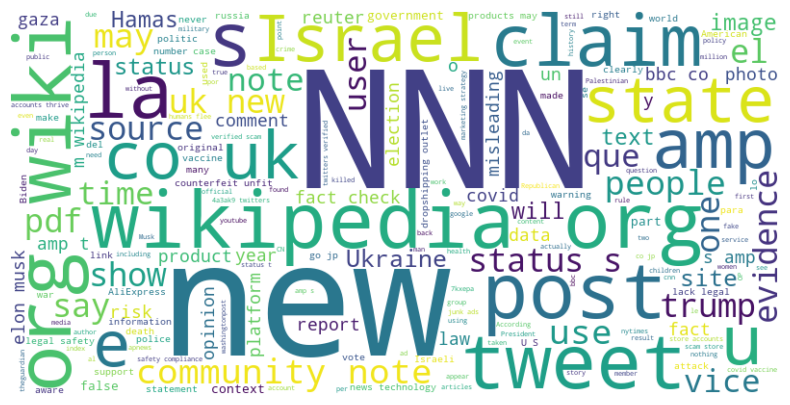

In [18]:
helpful = df[df['helpfulnessLevel'] == 'HELPFUL']
text = helpful.get('summary')
print(helpful)

helpful_corpus = ' '.join(text)

stopwords = set(STOPWORDS)
custom_stopwords = {'https', 'en', 'de', 'x', 'twitter', 'html', 'said', 'quot', 'video', 'article'}
stopwords.update(custom_stopwords)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(helpful_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()